In [3]:
!pip install rplanpy

C:\Users\aswin\AppData\Local\Temp\ipykernel_12180\3614996098.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:53: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  c = stats.mode(
c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:

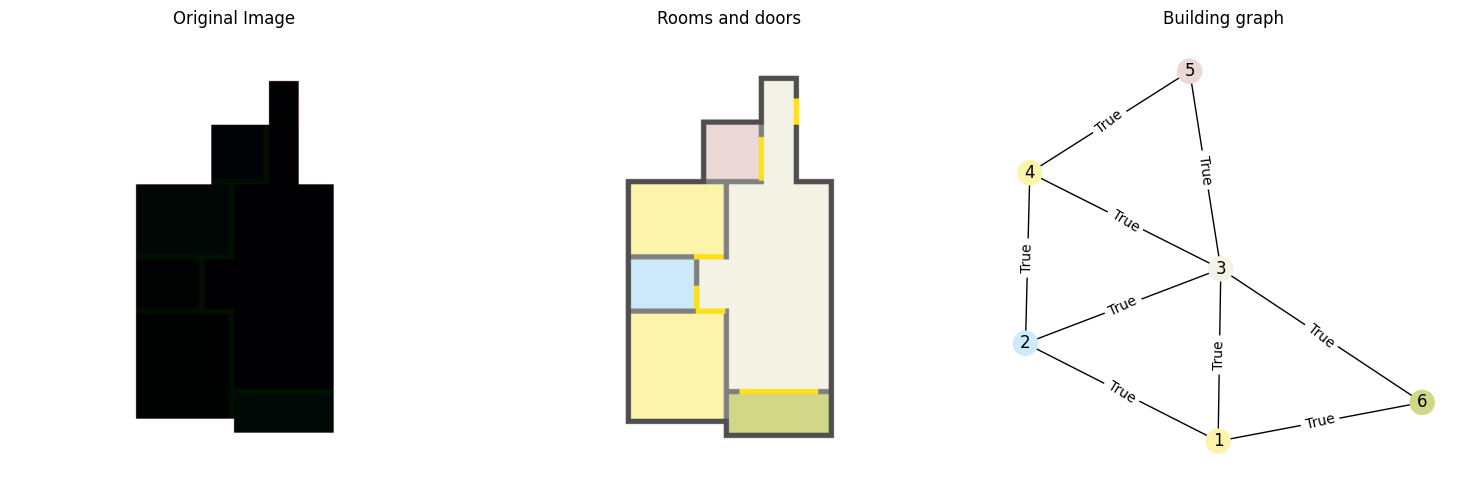

In [4]:
import rplanpy
import imageio
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(15,5))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
image=imageio.imread(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
ax[0].imshow(image,cmap='gray')
ax[0].axis("off")
ax[0].set_title("Original Image")
rplanpy.plot.plot_floorplan(data, ax=ax[1], title="Rooms and doors")
rplanpy.plot.plot_floorplan_graph(
    data=data, with_colors=True, edge_label='door', ax=ax[2],
    title="Building graph"
)
plt.tight_layout()
plt.show()

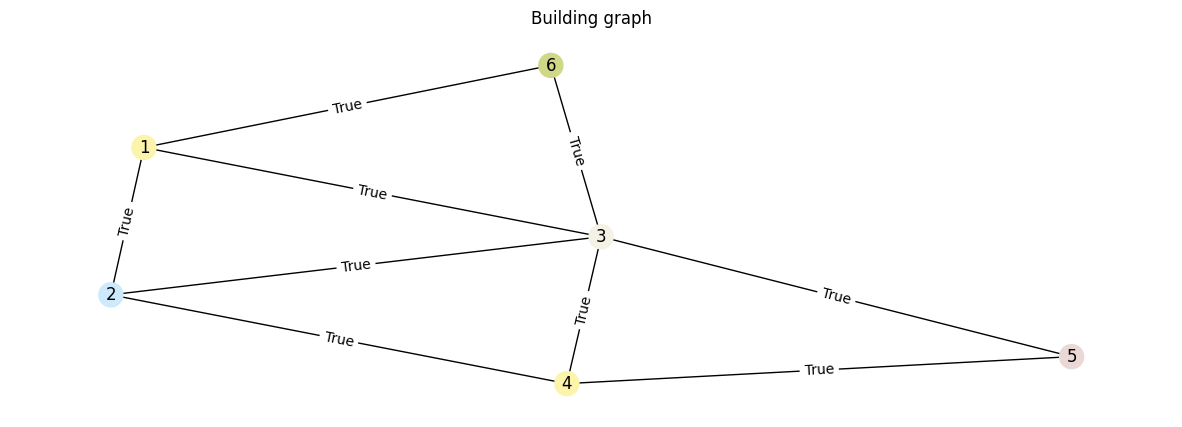

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
rplanpy.plot.plot_floorplan_graph(
    data=data, with_colors=True, edge_label='door', ax=ax,
    title="Building graph"
)
plt.savefig('build_graph1.png')
plt.show()

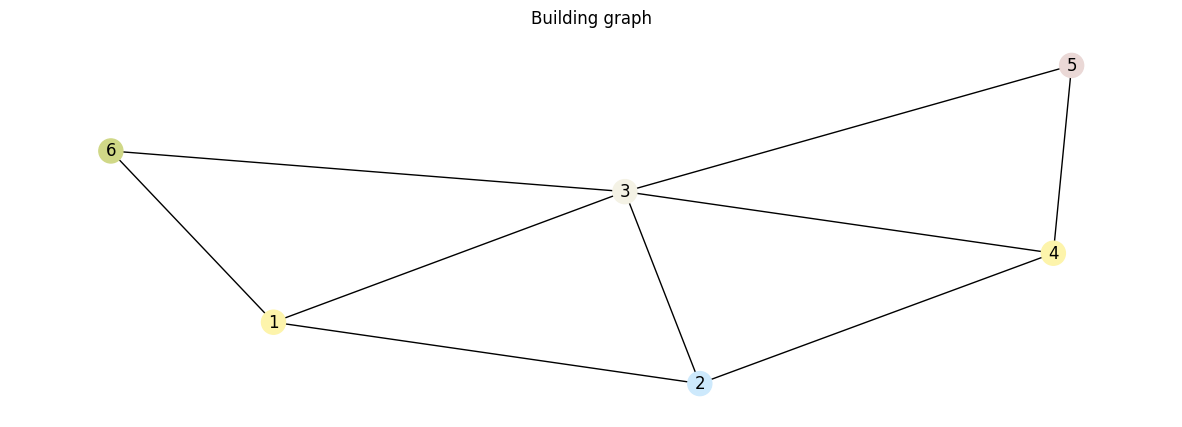

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
rplanpy.plot.plot_floorplan_graph(
    data=data, with_colors=True, edge_label=None, ax=ax,
    title="Building graph"
)
# plt.savefig('build_graph.png')
plt.show()

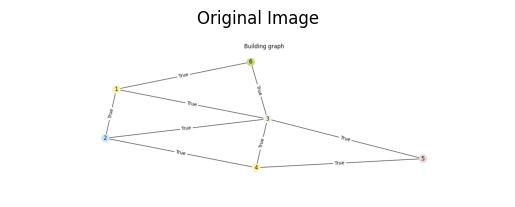

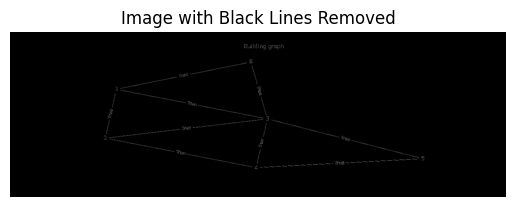

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'your_image.jpg' with your image file path)
image = cv2.imread('build_graph1.png')

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary mask
_, binary_mask = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)

# Invert the binary mask
inverted_mask = cv2.bitwise_not(binary_mask)

# Create a white background image
white_background = np.ones_like(image) * 255

# Merge the original image with the white background using the inverted mask
result_image = cv2.bitwise_and(white_background, image, mask=inverted_mask)

# Display the result (image with black lines removed)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Black Lines Removed')
plt.show()


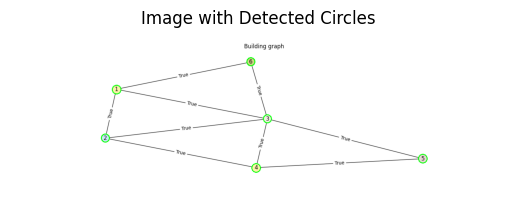

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'your_image.jpg' with your image file path)
image = cv2.imread('build_graph1.png')

# Create a copy of the original image to work with
result_image = image.copy()

# Convert the image to grayscale for circle detection
gray_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)

# Detect circles using the Hough Circle Transform
circles = cv2.HoughCircles(
    gray_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

# Check if circles were found
if circles is not None:
    circles = np.uint16(np.around(circles))

    # Iterate over detected circles and draw them on the original color image
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(result_image, center, radius, (0, 255, 0), 2)  # Draw a green circle

    # Display the result image with the detected circles
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Image with Detected Circles')
    plt.show()
else:
    print("No circles found in the image.")


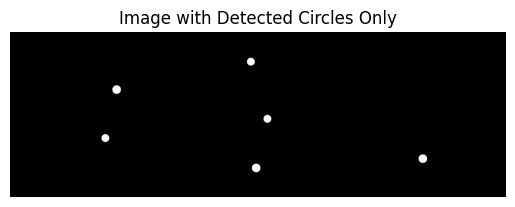

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'your_image.jpg' with your image file path)
image = cv2.imread('build_graph1.png')

# Create a blank canvas with the same dimensions as the original image
height, width, _ = image.shape
blank_canvas = np.zeros((height, width, 3), dtype=np.uint8)

# Convert the image to grayscale for circle detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect circles using the Hough Circle Transform
circles = cv2.HoughCircles(
    gray_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

# Check if circles were found
if circles is not None:
    circles = np.uint16(np.around(circles))

    # Iterate over detected circles and draw them on the blank canvas
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(blank_canvas, center, radius, (255, 255, 255), -1)  # Draw a white filled circle

    # Display the result image with the detected circles
    plt.imshow(cv2.cvtColor(blank_canvas, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Image with Detected Circles Only')
    plt.show()
else:
    print("No circles found in the image.")


Trying out the direct rplanpy module code modification idea

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import data
import utils


def floorplan_to_color_custom(data: data.RplanData):
    """
    Get an image like object with the color for each pixel

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :return: list of colors for each pixel
    :rtype: list
    """
    coloured_image = [[utils.ROOM_COLOR[pix] for pix in row] for row in data.category]
    return coloured_image


def plot_floorplan_custom(data: data.RplanData, ax=None, title=None):
    """
    Plot a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    coloured_image = floorplan_to_color_custom(data)
    if ax is None:
        ax = plt.subplot()
    ax.imshow(coloured_image)
    ax.set_title(title)
    ax.axis("off")
    return ax


def plot_floorplan_graph_custom(data: data.RplanData, ax=None, title=None,
                         with_colors=True, edge_label=None):
    """
    Plot the graph representation for a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :param with_colors: optional, whether to colour nodes by their class or not, defaults to True
    :type with_colors: bool
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    if ax is None:
        ax = plt.subplot()
    G = data.get_graph()
    pos = nx.spring_layout(G)
    if with_colors:
        colors = [np.array(utils.ROOM_COLOR.get(G.nodes[n]['category'], [255, 255, 255]))/255 for n in G.nodes]
        nx.draw(G, pos, with_labels=True, ax=ax, node_color=colors)
    else:
        nx.draw(G, pos, with_labels=True, ax=ax)
    if edge_label:
        edge_labels = nx.get_edge_attributes(G, edge_label)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    return ax

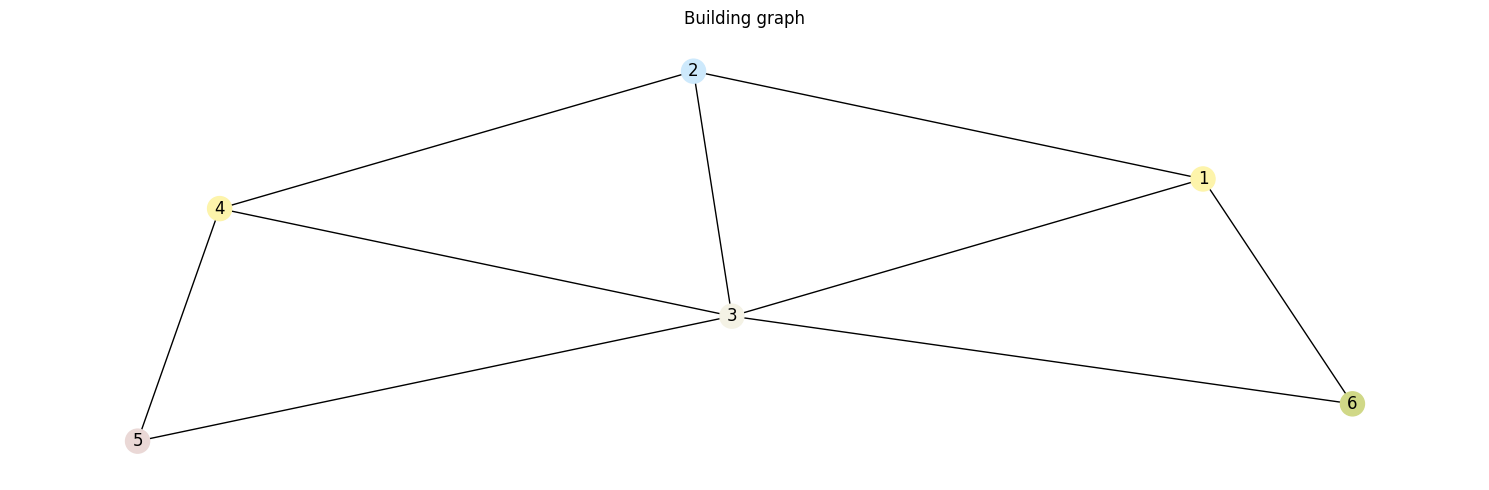

In [11]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
# ax[0].set_title("Original Image")
plot_floorplan_graph_custom(data=data, with_colors=True, edge_label=None, ax=ax1,title="Building graph")
plt.tight_layout()
plt.show()


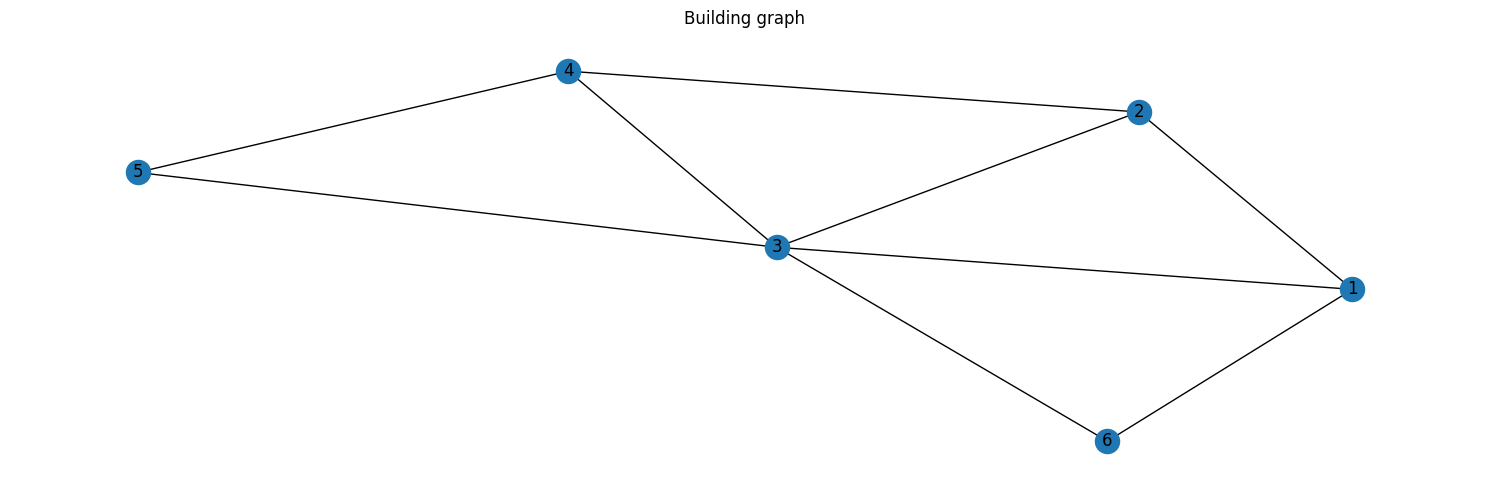

In [12]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
# ax[0].set_title("Original Image")
plot_floorplan_graph_custom(data=data, with_colors=False, edge_label=None, ax=ax1,title="Building graph")
plt.tight_layout()
plt.show()


In [13]:
# floorplan_to_color_custom(data1)

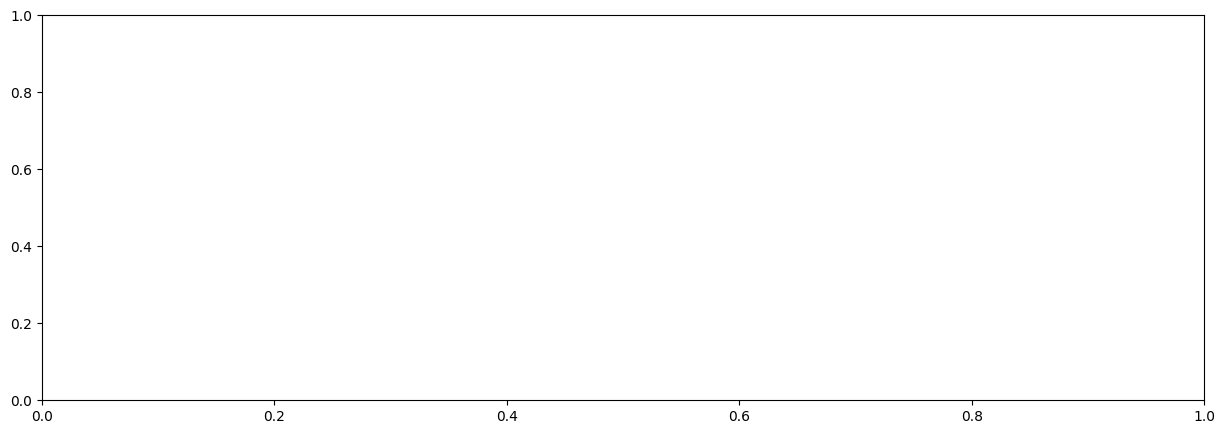

In [14]:
import matplotlib.pyplot as plt
fig2, ax2= plt.subplots(1, 1, figsize=(15, 5))
rplanpy.plot.floorplan_to_color(data=data)
# plt.savefig('build_graph.png')
plt.show()

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import data
import utils


def floorplan_to_color_custom(data: data.RplanData):
    """
    Get an image like object with the color for each pixel

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :return: list of colors for each pixel
    :rtype: list
    """
    coloured_image = [[utils.ROOM_COLOR[pix] for pix in row] for row in data.category]
    return coloured_image


def plot_floorplan_custom(data: data.RplanData, ax=None, title=None):
    """
    Plot a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    coloured_image = floorplan_to_color_custom(data)
    if ax is None:
        ax = plt.subplot()
    ax.imshow(coloured_image)
    ax.set_title(title)
    ax.axis("off")
    return ax


def plot_floorplan_graph_custom1(data: data.RplanData, ax=None, title=None,
                         with_colors=True, edge_label=None):
    """
    Plot the graph representation for a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :param with_colors: optional, whether to colour nodes by their class or not, defaults to True
    :type with_colors: bool
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    if ax is None:
        ax = plt.subplot()
    G = data.get_graph()
    # pos = nx.spring_layout(G)
    pos = nx.spring_layout(G, k=4000)

    if with_colors:
        colors = [np.array(utils.ROOM_COLOR.get(G.nodes[n]['category'], [255, 255, 255]))/255 for n in G.nodes]
        nx.draw(G, pos, with_labels=True, ax=ax, node_color=colors,node_size=900,edge_color='none')
        print("hello1")

    else:
        nx.draw(G, pos, with_labels=True, ax=ax,node_size=9000,edge_color='none')
        print("hello2")
    if edge_label:
        edge_labels = nx.get_edge_attributes(G, edge_label)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
        print("hello3")

    ax.set_title(title)
    return ax

c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:53: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  c = stats.mode(
c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:58: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


hello1


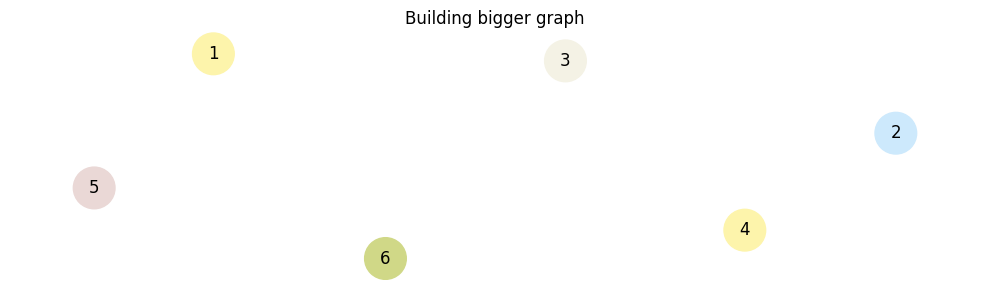

In [24]:
fig2, ax2 = plt.subplots(figsize=(10, 3))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
# ax[0].set_title("Original Image")
plot_floorplan_graph_custom1(data=data, with_colors=True, edge_label=None, ax=ax2,title="Building bigger graph")
plt.tight_layout()
plt.savefig("Nodes.jpg")
plt.show()


In [17]:
import utils
print(utils.ROOM_TYPE)

{0: 'PublicArea', 1: 'Bedroom', 2: 'FunctionArea', 3: 'FunctionArea', 4: 'FunctionArea', 5: 'Bedroom', 6: 'Bedroom', 7: 'Bedroom', 8: 'Bedroom', 9: 'PublicArea', 10: 'PublicArea', 11: 'PublicArea', 12: 'PublicArea', 13: 'External', 14: 'ExteriorWall', 15: 'FrontDoor', 16: 'InteriorWall', 17: 'InteriorDoor'}


In [25]:
import cv2
import numpy as np

def apply_non_uniform_blur(image_path, custom_kernel):
    """
    Apply a non-uniform blur to an image.

    :param image_path: Path to the input image.
    :type image_path: str
    :param custom_kernel: Custom blur kernel (2D numpy array).
    :type custom_kernel: numpy.ndarray
    :return: Blurred image.
    :rtype: numpy.ndarray
    """
    # Load the image
    image = cv2.imread(image_path)

    # Normalize the custom kernel
    custom_kernel /= custom_kernel.sum()

    # Apply the convolution operation
    blurred_image = cv2.filter2D(image, -1, custom_kernel)

    return blurred_image

# Load your custom kernel (modify as needed)
custom_kernel = np.array([[0.1, 0.2, 0.1],
                          [0.2, 0.5, 0.2],
                          [0.1, 0.2, 0.1]])

# Apply non-uniform blur to an image
input_image_path = 'Nodes.jpg'
blurred_image = apply_non_uniform_blur(input_image_path, custom_kernel)

# Display the original and blurred images
# cv2.imshow('Original Image', cv2.imread(input_image_path))
# cv2.imshow('Blurred Image', blurred_image)

output_image_path = 'blurred_image.jpg'
cv2.imwrite(output_image_path, blurred_image)

True

: 

In [19]:
import cv2
import numpy as np

def apply_extreme_blur(image_path):
    """
    Apply an extreme blur to an image.

    :param image_path: Path to the input image.
    :type image_path: str
    :return: Blurred image.
    :rtype: numpy.ndarray
    """
    # Load the image
    image = cv2.imread(image_path)

    # Define the kernel size and standard deviation
    kernel_size = (51, 51)  # Adjust the size as needed
    sigma_x = 5  # Adjust the standard deviation as needed

    # Apply Gaussian blur with a large kernel
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma_x)

    return blurred_image

# Apply extreme blur to an image
input_image_path = 'Nodes.jpg'
blurred_image1 = apply_extreme_blur(input_image_path)

# Save or display the blurred image as needed
output_image_path = 'blurred_image_ext.jpg'
cv2.imwrite(output_image_path, blurred_image1)

True

In [20]:
import cv2
import numpy as np

def stretch_circles(image_path, axis='x'):
    """
    Stretch circles into elongated ellipses parallel to the specified axis.

    :param image_path: Path to the input image with circles.
    :type image_path: str
    :param axis: Axis for stretching ('x' or 'y').
    :type axis: str
    :return: Image with stretched ellipses.
    :rtype: numpy.ndarray
    """
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect circles in the image using HoughCircles
    circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=30,
        minRadius=0,
        maxRadius=0
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        # Stretch circles into ellipses
        for circle in circles[0, :]:
            center_x, center_y = circle[0], circle[1]
            radius = circle[2]
            
            if axis == 'x':
                # Stretch parallel to the x-axis
                cv2.ellipse(image, (center_x, center_y), (radius, int(radius * 2)), 0, 0, 360, (0, 255, 0), -1)
            elif axis == 'y':
                # Stretch parallel to the y-axis
                cv2.ellipse(image, (center_x, center_y), (int(radius * 2), radius), 0, 0, 360, (0, 255, 0), -1)

    return image

# Apply stretching to circles in an image parallel to the x-axis
input_image_path = 'Nodes.jpg'
stretched_image_x = stretch_circles(input_image_path, axis='x')

# Apply stretching to circles in an image parallel to the y-axis
stretched_image_y = stretch_circles(input_image_path, axis='y')

# Display the original and stretched images
cv2.imshow('Original Image', cv2.imread(input_image_path))
cv2.imshow('Stretched Image (X-axis)', stretched_image_x)
cv2.imshow('Stretched Image (Y-axis)', stretched_image_y)
output_image_path1="x.jpg"
output_image_path2="Y.jpg"
cv2.imwrite(output_image_path1, stretched_image_x)
cv2.imwrite(output_image_path2, stretched_image_y)





True